In [5]:
from typing import Optional
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

def download_daily_prices(ticker:str, days:int, parquet_path:Optional[str]=None):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=days)
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    data.columns = data.columns.str.lower()
    data.index = pd.to_datetime(data.index)
    data['symbol'] = ticker.upper()
    if parquet_path is not None:
        data.to_parquet(parquet_path)
    return data

symbols = ["QQQ", "SMH", "SOXX", "SPY", "XBI", "XLC", "XLE", "XLF", "XLK", "XLRE", "XLU", "XLV", "XLY", "XLP", "XLI", "XLB"]

for symbol in symbols:
    print(symbol)
    data = download_daily_prices(ticker=symbol,
                               days=365*15, 
                               parquet_path=f'../sectors/{symbol}_daily.parquet')
    #print(len(data))
    print(data.head())

QQQ
                 open       high        low      close  adj close     volume  \
Date                                                                           
2009-11-16  44.200001  44.650002  44.119999  44.459999  38.832016   87776100   
2009-11-17  44.340000  44.599998  44.250000  44.599998  38.954292   81884000   
2009-11-18  44.459999  44.490002  44.049999  44.349998  38.735943  100240800   
2009-11-19  44.049999  44.080002  43.349998  43.660000  38.133293  114558000   
2009-11-20  43.430000  43.549999  43.279999  43.439999  37.941128   70912100   

           symbol  
Date               
2009-11-16    QQQ  
2009-11-17    QQQ  
2009-11-18    QQQ  
2009-11-19    QQQ  
2009-11-20    QQQ  
SMH
              open    high     low   close  adj close    volume symbol
Date                                                                  
2009-11-16  12.945  13.185  12.935  13.165  11.263780  19216200    SMH
2009-11-17  13.115  13.175  12.990  13.160  11.259502  16100200    SMH
2009-11

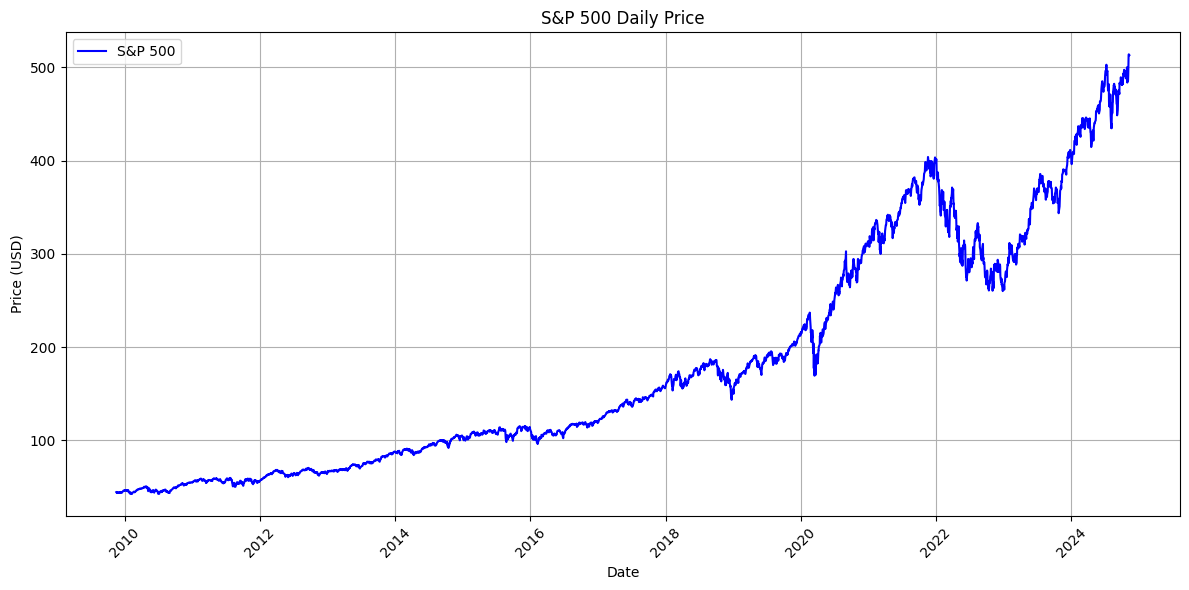

In [12]:
import matplotlib.pyplot as plt

data = pd.read_parquet('../sectors/QQQ_daily.parquet')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['close'], 'b-', label='S&P 500')

# Customize the plot
plt.title('S&P 500 Daily Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


DataFrame Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2014-11-11 to 2024-11-07
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       2515 non-null   float64
 1   high       2515 non-null   float64
 2   low        2515 non-null   float64
 3   close      2515 non-null   float64
 4   adj close  2515 non-null   float64
 5   volume     2515 non-null   int64  
 6   symbol     2515 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 157.2+ KB
None

First few rows:
--------------------------------------------------
                  open        high         low       close   adj close  \
Date                                                                     
2014-11-11  204.059998  204.309998  203.649994  204.179993  171.175308   
2014-11-12  203.350006  204.240005  203.309998  203.960007  170.990860   
2014-11-13  204

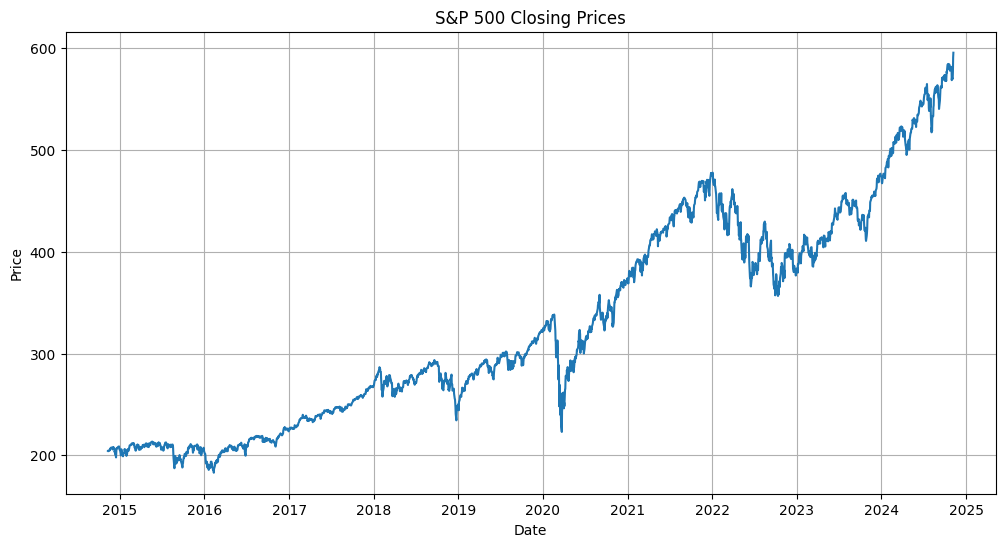


Daily Returns Summary:
--------------------------------------------------
count    2514.000000
mean        0.000488
std         0.011150
min        -0.109424
25%        -0.003793
50%         0.000587
75%         0.005900
max         0.090603
Name: close, dtype: float64

Last values of moving averages:
--------------------------------------------------
50-day MA: 570.50
200-day MA: 536.50


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def load_sp500_data(file_path='/tmp/SPY_daily.parquet'):
    """
    Load S&P 500 data from parquet file and return a pandas DataFrame
    """
    try:
        # Check if file exists
        if not Path(file_path).is_file():
            raise FileNotFoundError(f"No parquet file found at {file_path}")
            
        # Load the parquet file
        df = pd.read_parquet(file_path)
        
        # Verify the index is datetime
        if not isinstance(df.index, pd.DatetimeIndex):
            df.index = pd.to_datetime(df.index)
            
        return df
        
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

def display_data_info(df):
    """
    Display basic information about the loaded data
    """
    print("\nDataFrame Info:")
    print("-" * 50)
    print(df.info())
    
    print("\nFirst few rows:")
    print("-" * 50)
    print(df.head())
    
    print("\nBasic statistics:")
    print("-" * 50)
    print(df.describe())
    
    print("\nDate range:")
    print("-" * 50)
    print(f"Start date: {df.index.min()}")
    print(f"End date: {df.index.max()}")
    print(f"Total days: {len(df)}")

def plot_closing_prices(df):
    """
    Create a simple plot of closing prices
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['close'])
    plt.title('S&P 500 Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()



df = load_sp500_data()
    

# Display information about the loaded data
display_data_info(df)

# Create a simple plot
plot_closing_prices(df)

# Example of calculating daily returns
daily_returns = df['close'].pct_change()
print("\nDaily Returns Summary:")
print("-" * 50)
print(daily_returns.describe())

# Example of calculating moving averages
ma50 = df['close'].rolling(window=50).mean()
ma200 = df['close'].rolling(window=200).mean()

print("\nLast values of moving averages:")
print("-" * 50)
print(f"50-day MA: {ma50.iloc[-1]:.2f}")
print(f"200-day MA: {ma200.iloc[-1]:.2f}")